# Not Just Another Genre Predictor - Supervised and Unsupervised Learning Algorithms for Genre Classification

**<span style="color:CornflowerBlue">by Samantha Garcia, Brainstation Data Science Student (May - August 2022) </span>**

## Notebook 4: Unsupervised Learning - Clustering

### Table of Contents

1. Recap<br>
    1.1 [Business and Machine Learning Questions](#1.1)<br>
    1.2 [Modeling Expectations](#1.2)<br>
    1.3 [Feature Dictionary](#1.3)<br>
    1.4 [Imports and Scaling](#1.4)<br>
    

2. Modeling<br>
    2.1 [KMeans Model](#2.1)<br>
    2.2 [DBscan Model](#2.2)<br>
    

3. Interpretation of Clustering Result<br>
    3.1 [KMeans Clusters - Feature Means by Cluster](#3.1)<br>
        
---

## 1. Recap

### 1.1 Business and Machine Learning Questions  <a id="1.1"></a>

#### Business Question

>Can we predict a song's popularity (and therefore value) based on its attributes

This is a limited measurement without access to more granular information such as geographical consumption metrics, social media penetration, etc.

We will work on a starter model focusing initially on song attribute clustering and genre analysis with a view to further development in the future to layer on value metrics, given access to the more granular information mentioned above and below.

**Creating a tool that can classify any given song into a genre or attribute-based cluster is a good first step in this direction. Which leads us to the Machine Learning Question:**

#### Machine Learning Question

>Can we derive song FEATURE PROFILES (by inspecting the song's audio attributes derived by Spotify) and ascribe VALUE to individual song features or FEATURE PROFILES

Often, songs are given a genre subjectively by music managers' opinion or songs carry genres from the Artists' genre identity, Developing an in-house model for categorising genre based on attributes, then layering on a popularity or value measure, can be of value particularly when tailored for use alongside private data held by the song copyright owners.

**We will implement 2 learning algorithms as follows:**

1. a supervised learning model where we tell the algorithm what genres the songs belong to, based on subjective 'human' genre labels - the aim here is to build a tool whereby any user can upload a song and be told what genre the song belongs to


2. an unsupervised learning model where we ask the algorithm to cluster songs based on their attributes, without seeing the songs' existing genre labels - the aim here is to ignore conventional genre labels and create a tool where songs are grouped based on machine-derived feature profiles and are given VALUE IMPORTANCE based on clearly identifiable clusters

**A secondary goal from implementing the two models will be:**

3. can we define the song clusters in a way that is understandable to the average human music listener? we could cross reference the cluster outputs from the unsupervised algorithm against the genre classes from the supervised learning algorithm to deteremine whether any of the genres are 'natural' genres or not

### 1.2 Modeling Expectations  <a id="1.2"></a>

For the supervised learning algorithm we will perform hyperparamter optimisation and model selection to choose a best fit model for multiclass classification. We will build a pipeline and perform grid search, and apply scaling to transform the data within the pipeline. Grid search will implement a 5 fold cross validation as default, we will optimise for that within the pipeline also.

We will NOT use PCA as we believe the dataset has a small enough number of features - runtime may be more efficient with PCA but feature importance will be eaier to measure from our best estimators without appying PCA. If we find our models take prohibitively long to run then we will reconsider.

The models we will look at are:

- Logistic Regression (baseline)
- KNN
- SVM (multiclass)
- Random Forests

For the unsupervised learning algorithm we will look at 3 clustering methods to see which is the best fit for our dataset:

- K-Means
- DBSCAN
- Hierarchical Clustering

If we have time we will also look at how Neural Networks perform at classifying our songs.

**Expected outcomes:**

We expect that supervised learning will be challenged to correctly predict genre as there is much crossover across contemporary genres - we expect the unsupervised models to provide more interesting results and find clusters that can be interpreted as defined based on song types.

These clusters can then be combined with our metrics in future iterations of this project to:

- understand how value is created across song clusters
- help in deciding how to exploit any given song (by seeing which cluster it falls into and placing it in suitable mediums for exploitation)

... and much more.

We expect classical music, EDM and other contemporary genres to be identifiable separately as they are conceptually quite different from each other as groups.


### 1.3 Feature Dictionary  <a id="1.3"></a>

Let's revisit our data dictionary, focusing on the features we will analyse for the above models.

<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Column Name</th>
    <th style="text-align: left; background: lightgrey">Column Contents</th>
  </tr>
  <tr>
    <td style="text-align: left"> <code>song_name</code> </td>
    <td style="text-align: left">Name of Song</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>danceability</code></td>
    <td style="text-align: left">Describes how suitable a track is for dancing based on a combination of musical elements including temppo, rhythm stability, beat stregth and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>energy</code></td>
    <td style="text-align: left">Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud and noisy. For example, death metal has high energy while a Bach prelude scores low on the scale. Perceptual features contribuiting to this attribute include dynamic range, perceived loudness, timbre, onset rate and general entropy.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>key</code></td>
    <td style="text-align: left">The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>loudness</code></td>
    <td style="text-align: left">The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>mode</code></td>
    <td style="text-align: left">Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>speechiness</code></td>
    <td style="text-align: left">Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>acousticness</code></td>
    <td style="text-align: left">number A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>instrumentalness</code></td>
    <td style="text-align: left">Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>liveness</code></td>
    <td style="text-align: left">Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>valence</code></td>
    <td style="text-align: left">A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>tempo</code></td>
    <td style="text-align: left">The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>id</code></td>
    <td style="text-align: left">The Spotify ID for the track. This is our unique identifier, consider making this the index.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>uri</code></td>
    <td style="text-align: left">The Spotify URI for the track. A Spotify URI is a unique resource indicator code (and link) for music on their platform. It is a link to directly share your songs to fans.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>track_href</code></td>
    <td style="text-align: left">A link to the Web API endpoint providing full details of the track.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>analysis_url</code></td>
    <td style="text-align: left">A URL to access the full audio analysis of this track. An access token is required to access this data.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>duration_ms</code></td>
    <td style="text-align: left">The duration of the track in milliseconds.</td>
  </tr>
      <tr>
    <td style="text-align: left"><code>time_signature</code></td>
    <td style="text-align: left">An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".</td>
  </tr>
          <tr>
    <td style="text-align: left"><code>genre</code></td>
    <td style="text-align: left">Subjective genre given to each group of songs based on user perception.</td>
  </tr>
</table>

The dataset currently contains columns we won't be using for analysis, which we will drop when we perform feature selction below.

---

### 1.4 Imports and Scaling  <a id="1.4"></a>

Let's import our packages and csv file.

Our data has already been transformed, including scaling, in Notebook 2.

In [1]:
# import required packages
# packages will be added here as they come up during coding
# this is therefore a complete list of all packages used within this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

In [2]:
# import dataframe from csv file from notebook #2
unsupervised_df = pd.read_csv('../data/unsupervised_df.csv', index_col=0)

# create version of dataframe with only song features for modeling
# drop IDs, URLs and duration
unsupervised_df.drop('genre_group', axis=1, inplace=True)
unsupervised_df

,acousticness,danceability,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence,EAL
0,0.5310,0.620,0.000000,2,0.134,1,0.6780,181.681000,4,0.720,-6.615800
1,0.1340,0.726,0.000000,6,0.245,1,0.3480,92.385002,4,0.930,-2.077560
2,0.1170,0.798,0.000000,6,0.694,1,0.3450,89.220001,4,0.885,-2.241207
3,0.1750,0.767,0.000010,7,0.372,1,0.3540,91.891998,4,0.528,-5.445949
4,0.5060,0.738,0.000000,10,0.098,0,0.2380,167.992996,4,0.668,-3.875256
...,...,...,...,...,...,...,...,...,...,...,...
114507,0.5610,0.763,0.000000,5,0.120,1,0.1300,129.559006,4,0.835,-4.593078
114508,0.0965,0.672,0.000001,5,0.137,1,0.0285,107.949997,4,0.582,-5.174831
114509,0.7300,0.671,0.949000,5,0.102,0,0.0312,90.037003,4,0.883,-5.810112
114510,0.0837,0.678,0.006840,0,0.238,1,0.0270,122.125999,4,0.482,-3.966212


In [3]:
# have a look at the data
unsupervised_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114512 entries, 0 to 114511
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      114512 non-null  float64
 1   danceability      114512 non-null  float64
 2   instrumentalness  114512 non-null  float64
 3   key               114512 non-null  int64  
 4   liveness          114512 non-null  float64
 5   mode              114512 non-null  int64  
 6   speechiness       114512 non-null  float64
 7   tempo             114512 non-null  float64
 8   time_signature    114512 non-null  int64  
 9   valence           114512 non-null  float64
 10  EAL               114512 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 10.5 MB


In [4]:
# scaler
minmaxscaler = MinMaxScaler()

unsupervised_df_scaled = minmaxscaler.fit_transform(unsupervised_df)

unsupervised_df_scaled = pd.DataFrame(unsupervised_df_scaled)

# PUT BACK COLUMN NAMES
old_colnames = list(unsupervised_df_scaled.columns)
new_colnames= list(unsupervised_df.columns)
rename_dict = {a:b for a,b in zip(old_colnames,new_colnames)}
unsupervised_df_scaled.rename(columns=rename_dict, inplace=True)
unsupervised_df_scaled

,acousticness,danceability,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence,EAL
0,0.533133,0.607598,0.000000,0.181818,0.124545,1.0,0.696294,0.693276,0.75,0.720,0.660379
1,0.134538,0.718222,0.000000,0.545455,0.236757,1.0,0.345864,0.280234,0.75,0.930,0.820077
2,0.117470,0.793363,0.000000,0.545455,0.690659,1.0,0.342678,0.265594,0.75,0.885,0.814318
3,0.175703,0.761010,0.000010,0.636364,0.365144,1.0,0.352235,0.277953,0.75,0.528,0.701546
4,0.508032,0.730745,0.000000,0.909091,0.088152,0.0,0.229054,0.629961,0.75,0.668,0.756817
...,...,...,...,...,...,...,...,...,...,...,...
114507,0.563253,0.756836,0.000000,0.454545,0.110392,1.0,0.114368,0.452184,0.75,0.835,0.731558
114508,0.096888,0.661866,0.000001,0.454545,0.127578,1.0,0.006584,0.352230,0.75,0.582,0.711086
114509,0.732932,0.660822,0.949950,0.454545,0.092196,0.0,0.009451,0.269373,0.75,0.883,0.688731
114510,0.084036,0.668128,0.006847,0.000000,0.229681,1.0,0.004991,0.417802,0.75,0.482,0.753617


---
## 2. Modeling

### 2.1 K-Means Model   <a id="2.1"></a>

Let's look at inertia and silhouette scores.

In [268]:
%run -i capstone_functions.ipynb

Computing scores for k = 2
Computing scores for k = 3
Computing scores for k = 4
Computing scores for k = 5
Computing scores for k = 6
Computing scores for k = 7
Computing scores for k = 8
Computing scores for k = 9
Computing scores for k = 10
Computing scores for k = 11


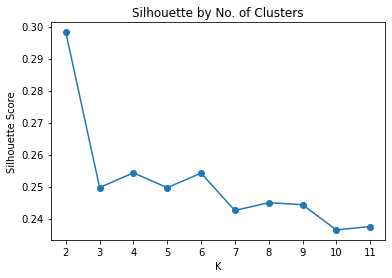

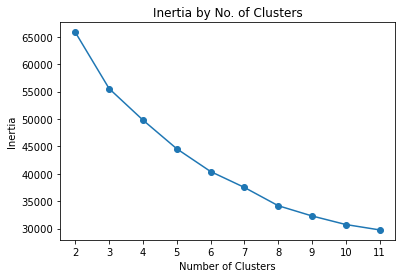

In [269]:
kmeans_k(unsupervised_df_scaled)

Inertia scores: we are hoping to see a clear inflection point / a clear break after which increasing k gives diminishing returns.
Is our expectation met? No, we're not really seeing any sharp elbow or inflection point. There is clear steady loss of inertia as K increases but no clear elbow.

Silhouette scores: high silhouette score = clear separation of data. The silhouette scores are low but the highest silhouette scores with more than 2 clusters are are 4 and 6.

4 Clusters is a good choice of n_clusters as it shows second highest separation of data (silhouette score) while being at one of the parts of the curve that shows most loss of inertia as k increases. It is the more efficient number to choose, as it shows the same level of sepration as 6 clusters, but we are looking for more clusters to investigate that we can use to separate songs, not fewer.

Next in line is 6 clusters, with the same level of silhouette score as 4 clusters. Out of curiosity as we have 6 clusters of genres in the supervised model we will look at 6 clusters for the KMeans model.

5 clusters could also work as the silhouette score is basically the same, only slightly less than 4 and 6 clusters.

Let's have a look at 6:

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 45805 samples in 0.825s...
[t-SNE] Computed neighbors for 45805 samples in 19.435s...
[t-SNE] Computed conditional probabilities for sample 1000 / 45805
[t-SNE] Computed conditional probabilities for sample 2000 / 45805
[t-SNE] Computed conditional probabilities for sample 3000 / 45805
[t-SNE] Computed conditional probabilities for sample 4000 / 45805
[t-SNE] Computed conditional probabilities for sample 5000 / 45805
[t-SNE] Computed conditional probabilities for sample 6000 / 45805
[t-SNE] Computed conditional probabilities for sample 7000 / 45805
[t-SNE] Computed conditional probabilities for sample 8000 / 45805
[t-SNE] Computed conditional probabilities for sample 9000 / 45805
[t-SNE] Computed conditional probabilities for sample 10000 / 45805
[t-SNE] Computed conditional probabilities for sample 11000 / 45805
[t-SNE] Computed conditional probabilities for sample 12000 / 45805
[t-SNE] Computed conditional probabilities for sa

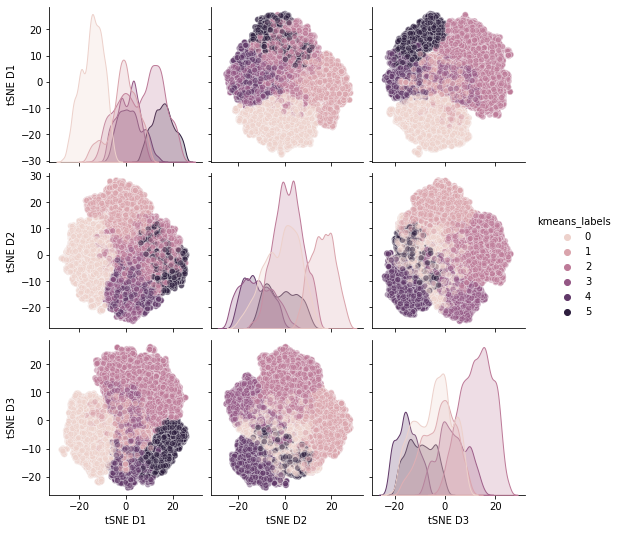

In [270]:
# run kmeans model for chosen number of clusters
kmeans_model(unsupervised_df_scaled,6)

Some of the clusters look quite mixed up at 6 clusters: the clear separation seems to suggest 4 or maybe 5 clusters.

We will re-run the model with 4 clusters.

In [271]:
# run with 4 clusters
KMeans_model = KMeans(n_clusters = 4)
kmeans_y_labels = KMeans_model.fit_predict(unsupervised_df_scaled)

# Let's add our labels to the dataset so we can colour our clusters on graphs
kmeans_df = unsupervised_df_scaled.copy()
kmeans_df['kmeans_labels'] = kmeans_y_labels

# export to dataframe
kmeans_df

,acousticness,danceability,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence,EAL,kmeans_labels
0,0.533133,0.607598,0.000000,0.181818,0.124545,1.0,0.696294,0.693276,0.75,0.720,0.660379,1
1,0.134538,0.718222,0.000000,0.545455,0.236757,1.0,0.345864,0.280234,0.75,0.930,0.820077,1
2,0.117470,0.793363,0.000000,0.545455,0.690659,1.0,0.342678,0.265594,0.75,0.885,0.814318,1
3,0.175703,0.761010,0.000010,0.636364,0.365144,1.0,0.352235,0.277953,0.75,0.528,0.701546,1
4,0.508032,0.730745,0.000000,0.909091,0.088152,0.0,0.229054,0.629961,0.75,0.668,0.756817,0
...,...,...,...,...,...,...,...,...,...,...,...,...
114507,0.563253,0.756836,0.000000,0.454545,0.110392,1.0,0.114368,0.452184,0.75,0.835,0.731558,1
114508,0.096888,0.661866,0.000001,0.454545,0.127578,1.0,0.006584,0.352230,0.75,0.582,0.711086,1
114509,0.732932,0.660822,0.949950,0.454545,0.092196,0.0,0.009451,0.269373,0.75,0.883,0.688731,3
114510,0.084036,0.668128,0.006847,0.000000,0.229681,1.0,0.004991,0.417802,0.75,0.482,0.753617,1


### 2.2 DBSCAN Model   <a id="2.2"></a>

DBScan is a density based model, let's see how it deals with our dataset.

First we'll run epsilon search - DBScan epsilon search is computationally expensive so we'll run on a stratified sample of our dataset, we need to create a fake x and y t odo the train test split with stratify for epsilon search:

In [9]:
# see how many repetitions of numbers y needs
unsupervised_df_scaled.shape[0]/4

28628.0

In [10]:
# create fake y
y = [1,2,3,4]*28628

In [11]:
# turn into dataframe
y = pd.DataFrame(y)

In [12]:
# have a look at y
y

,0
0,1
1,2
2,3
3,4
4,1
...,...
114507,4
114508,1
114509,2
114510,3


In [13]:
# create stratified sample for epsilon search
X_train, X_test,  y_train, y_test = train_test_split(unsupervised_df_scaled, y, test_size=0.25, stratify=y, random_state=1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11451 samples in 0.057s...
[t-SNE] Computed neighbors for 11451 samples in 1.583s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11451
[t-SNE] Computed conditional probabilities for sample 2000 / 11451
[t-SNE] Computed conditional probabilities for sample 3000 / 11451
[t-SNE] Computed conditional probabilities for sample 4000 / 11451
[t-SNE] Computed conditional probabilities for sample 5000 / 11451
[t-SNE] Computed conditional probabilities for sample 6000 / 11451
[t-SNE] Computed conditional probabilities for sample 7000 / 11451
[t-SNE] Computed conditional probabilities for sample 8000 / 11451
[t-SNE] Computed conditional probabilities for sample 9000 / 11451
[t-SNE] Computed conditional probabilities for sample 10000 / 11451
[t-SNE] Computed conditional probabilities for sample 11000 / 11451
[t-SNE] Computed conditional probabilities for sample 11451 / 11451
[t-SNE] Mean sigma: 0.141228
[t-SNE] KL divergence

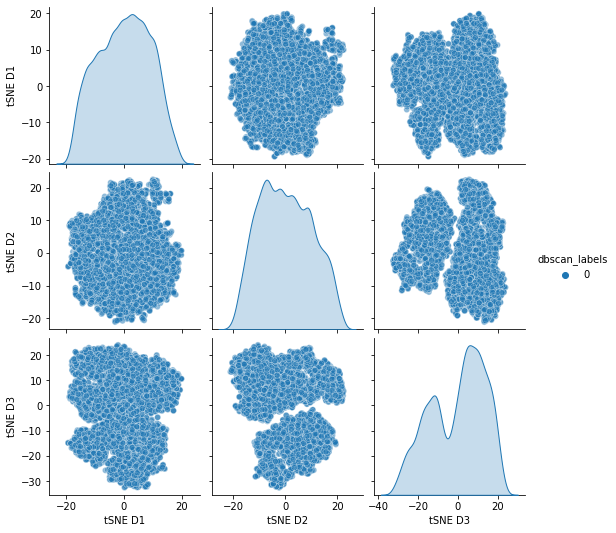

In [17]:
dbscan_model(X_test, 2)

This clustering model has not performed well with our dataset - the points are likely too dense and teh model is therfore detecting them all as one cluster.

As the KMeans model has effectively foudn clusters with our dataset we will use and interpret that model and not go further with DBScan or Hierarchical Clustering.

## 3 Interpretation of Clustering Result

### 3.1 KMeans Clusters - Feature Means by Cluster   <a id="3.1"></a>

In [272]:
# look again at kmeans df
kmeans_df

,acousticness,danceability,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence,EAL,kmeans_labels
0,0.533133,0.607598,0.000000,0.181818,0.124545,1.0,0.696294,0.693276,0.75,0.720,0.660379,1
1,0.134538,0.718222,0.000000,0.545455,0.236757,1.0,0.345864,0.280234,0.75,0.930,0.820077,1
2,0.117470,0.793363,0.000000,0.545455,0.690659,1.0,0.342678,0.265594,0.75,0.885,0.814318,1
3,0.175703,0.761010,0.000010,0.636364,0.365144,1.0,0.352235,0.277953,0.75,0.528,0.701546,1
4,0.508032,0.730745,0.000000,0.909091,0.088152,0.0,0.229054,0.629961,0.75,0.668,0.756817,0
...,...,...,...,...,...,...,...,...,...,...,...,...
114507,0.563253,0.756836,0.000000,0.454545,0.110392,1.0,0.114368,0.452184,0.75,0.835,0.731558,1
114508,0.096888,0.661866,0.000001,0.454545,0.127578,1.0,0.006584,0.352230,0.75,0.582,0.711086,1
114509,0.732932,0.660822,0.949950,0.454545,0.092196,0.0,0.009451,0.269373,0.75,0.883,0.688731,3
114510,0.084036,0.668128,0.006847,0.000000,0.229681,1.0,0.004991,0.417802,0.75,0.482,0.753617,1


In [273]:
# create feature means for each kmeans label
feature_means_kmeans = kmeans_df.groupby(by=kmeans_df['kmeans_labels'], axis=0).mean()
feature_means_kmeans.reset_index(inplace=True)
feature_means_kmeans

,kmeans_labels,acousticness,danceability,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence,EAL
0,0,0.288034,0.564322,0.039570,0.555005,0.211254,0.0,0.092548,0.409418,0.729124,0.517556,0.734248
1,1,0.147872,0.568631,0.189231,0.432278,0.214150,1.0,0.077771,0.427052,0.736055,0.524864,0.719720
2,2,0.850929,0.392597,0.385575,0.448382,0.178991,1.0,0.037475,0.365865,0.688073,0.329352,0.777741
3,3,0.424023,0.472853,0.787659,0.542847,0.170446,0.0,0.041861,0.399268,0.713479,0.332350,0.726969


In [274]:
# check parameter stats 
feature_means_kmeans.describe()

,kmeans_labels,acousticness,danceability,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence,EAL
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1.500000,0.427714,0.499601,0.350509,0.494628,0.193710,0.50000,0.062414,0.400401,0.716683,0.426031,0.739670
std,1.290994,0.303835,0.083903,0.324049,0.063237,0.022237,0.57735,0.027008,0.025727,0.021282,0.109951,0.026064
min,0.000000,0.147872,0.392597,0.039570,0.432278,0.170446,0.00000,0.037475,0.365865,0.688073,0.329352,0.719720
25%,0.750000,0.252993,0.452789,0.151816,0.444356,0.176855,0.00000,0.040764,0.390917,0.707128,0.331601,0.725157
50%,1.500000,0.356028,0.518587,0.287403,0.495615,0.195123,0.50000,0.059816,0.404343,0.721301,0.424953,0.730609
75%,2.250000,0.530749,0.565399,0.486096,0.545887,0.211978,1.00000,0.081465,0.413826,0.730856,0.519383,0.745121
max,3.000000,0.850929,0.568631,0.787659,0.555005,0.214150,1.00000,0.092548,0.427052,0.736055,0.524864,0.777741


Looking at the min and max values of these features, a few of them seem to fall within a very small range, suggesting there isn't much variability on those features across the culsters. i.e. they may not have much importance in defining the clusters.

All of the features have been scaled to fit between 0 and 1, let's look at the range of each:

In [21]:
# create df of min max and feature ranges (variability)
min_max_df = feature_means_kmeans.agg(['min', 'max'], axis=0).T
min_max_df['feature_range'] = min_max_df['max'] - min_max_df['min']
min_max_df

,min,max,feature_range
kmeans_labels,0.000000,6.000000,6.000000
acousticness,0.067003,0.910453,0.843450
danceability,0.319019,0.590942,0.271923
instrumentalness,0.025406,0.816760,0.791355
key,0.428938,0.602988,0.174050
liveness,0.152754,0.221472,0.068718
mode,0.000000,1.000000,1.000000
speechiness,0.027933,0.102837,0.074904
tempo,0.346231,0.441177,0.094946
time_signature,0.683491,0.737582,0.054091


The columns with narrow range all have less than 0.1 variability across the clusters:

- liveness 
- speechiness
- tempo
- time_signature 
- EAL

In the next notebook we'll plot the clusters with all features and without the low variability features to see the difference visually.

We are determining **FEATURE IMPORTANCE** while looking at our unsupervised cluster model results.

In [275]:
# export kmeans df for next notebook (4.b. clustering part 2)
# notebook couldn't handle everything in one so have had to split
feature_means_kmeans.to_csv('../data/feature_means_kmeans.csv')
kmeans_df.to_csv('../data/kmeans_df.csv')